# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## MISSING: New Cases for Liberia and needs to be determined

In [68]:
# import required libraries
import glob
import math
import numpy as np
import pandas as pd 

In [103]:
def getFiles(countryData):
    return glob.glob(DATA_FOLDER + 'ebola/' + countryData + '/*.csv')

def createDF(countryData, dateField, corruptedFiles):
    files = getFiles(countryData)
    list_ = []
    for file_ in files:
        # since certain file are corrupted and
        # there is no way for us to exactly match columns of
        # these to other files, we excluded them
        if file_.split("/")[-1] not in corruptedFiles:
            df_ = pd.read_csv(file_, parse_dates=[dateField,])                
            list_.append(df_)

    # fill NAN values with 0 for ease of calculation
    dfDummy = pd.concat(list_).fillna(0.)
    
    # standartize column names
    dfDummy = dfDummy.rename(columns={'Variable': 'description','Date': 'date',\
                          'variable': 'description','National': 'total',\
                          'Description': 'description', 'Total':'total',\
                          'Totals':'total'})

    # create new column called month
    dfDummy['month'] = dfDummy.apply(lambda x: x['date'].month, axis=1)
    dfDummy['day'] = dfDummy.apply(lambda x: x['date'].day, axis=1)
    return dfDummy

In [104]:
# List of corrupted files for Liberia
corruptedLiberia = ["2014-12-09.csv","2014-12-08.csv","2014-12-07.csv","2014-12-06.csv",
                    "2014-12-05.csv","2014-12-04.csv","2014-12-03.csv"]

In [105]:
# Avarage new cases per months for Liberia
# We've used the total of following three rows:
# New case/s (confirmed)
# New Case/s (Probable)
# New Case/s (Suspected)in order to calculate daily average
# since this rows gives the overall information of how many new cases occured each day
dfLiberia = createDF('liberia_data', 'Date', corruptedLiberia)
dfLiberia = dfLiberia[(dfLiberia.description == 'New Case/s (Suspected)')\
          | (dfLiberia.description == 'New Case/s (Probable)')\
          | (dfLiberia.description == 'New case/s (confirmed)')]
dfLiberia = dfLiberia.set_index(['month', 'day', 'description'])
dfLiberia['total'] = dfLiberia.total.astype('float64')
dfLiberia.groupby(level=['month','day']).sum().groupby(level=['month']).mean()['total']

month
6      5.714286
7      8.545455
8     37.222222
9     63.833333
10    45.560000
11    26.466667
12    36.000000
Name: total, dtype: float64

In [106]:
# Avarage deaths per months for Liberia
# We've used etc_new_deaths in order to calculate daily average
# since this row gives the overall information of how many death occured each day
dfLiberia = createDF('liberia_data', 'Date', corruptedLiberia)
dfLiberia = dfLiberia[(dfLiberia.description == "Newly reported deaths")][['total','month']]
dfLiberia['total'] = dfLiberia.total.astype('float64')
dfLiberia.groupby('month').mean()['total']

month
6      2.000000
7      4.272727
8     23.222222
9     36.041667
10    28.040000
11    13.466667
12     0.000000
Name: total, dtype: float64

In [107]:
# Avarage new cases per months for Sierra
# We've used the total of following four rows:
# new_noncase
# new_suspected
# new_probable
# new_confirmed in order to calculate daily average
# since this rows gives the overall information of how many new cases occured each day
dfSierra = createDF('sl_data', 'date', [])
dfSierra = dfSierra[(dfSierra.description == 'new_noncase')\
          | (dfSierra.description == 'new_suspected')\
          | (dfSierra.description == 'new_confirmed')\
          | (dfSierra.description == 'new_probable')]
dfSierra = dfSierra.set_index(['month', 'day', 'description'])
dfSierra['total'] = dfSierra.total.astype('float64')
dfSierra.groupby(level=['month','day']).sum().groupby(level=['month']).mean()['total']

month
8      34.850000
9      67.931034
10    124.214286
11    156.142857
12    135.800000
Name: total, dtype: float64

In [109]:
# Avarage new cases per months for Sierra
# We've used "Total new cases registered" so far in order to calculate daily average
# since this row gives the overall information of how many new cases occured each day
dfSierra = createDF('sl_data', 'date', [])
dfSierra = dfSierra[(dfSierra.description == "etc_new_deaths")][['total','month']]
dfSierra['total'] = dfSierra.total.astype('float64')
dfSierra.groupby('month').mean()['total']

month
8     0.000000
9     0.275862
10    3.535714
11    0.571429
12    2.200000
Name: total, dtype: float64

In [110]:
# List of corrupted files for Guinea
corruptedGuinea = ["2014-08-04.csv"]

In [111]:
# Avarage new cases per months for Guinea
# We've used "Total new cases registered" so far in order to calculate daily average
# since this row gives the overall information of how many new cases occured each day
dfGuinea = createDF('guinea_data', 'Date',corruptedGuinea)
dfGuinea = dfGuinea[(dfGuinea.description == "Total new cases registered so far")]\
    [['total','month']]
dfGuinea['total'] = dfGuinea.total.astype('float64')
dfGuinea.groupby('month').mean()['total']

month
8     30.000
9     19.625
10    34.000
Name: total, dtype: float64

In [112]:
# Avarage deaths per months for Guinea
# We've used "New deaths registered" so far in order to calculate daily average
# since this row gives the overall information of how many new deaths occured each day
dfGuinea = createDF('guinea_data', 'Date',corruptedGuinea)
dfGuinea = dfGuinea[(dfGuinea.description == "New deaths registered")]\
    [['total','month']]
dfGuinea['total'] = dfGuinea.total.astype('float64')
dfGuinea.groupby('month').mean()['total']

month
8      3.7500
9      3.5625
10    15.0000
Name: total, dtype: float64

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [113]:
import os
files = glob.glob(DATA_FOLDER+'/microbiome/MID*.xls') 
df2 = pd.concat(pd.read_excel(filename, header=None).assign(BARCODE=os.path.basename(filename).strip(".xls")) for filename in files)

In [114]:
md = pd.read_excel(DATA_FOLDER+'microbiome/metadata.xls')

In [115]:
df3 = pd.merge(df2, md, on='BARCODE', how='outer')

In [116]:
df3.index = df3[0] + "-" + df3['BARCODE']

In [117]:
df3 = df3.fillna('unknown')

In [118]:
df3.columns = ['DESCRIPTION','AMOUNT','BARCODE','GROUP','SAMPLE']

In [119]:
df3.head(10)

,DESCRIPTION,AMOUNT,BARCODE,GROUP,SAMPLE
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera-MID6","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus-MID6","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrodictium-MID6","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus-MID6","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus-MID6","Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",5,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Sulfurisphaera-MID6","Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",4,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum-MID6","Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",4,MID6,NEC 1,stool
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermoproteaceae Caldivirga-MID6","Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",1,MID6,NEC 1,stool
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella-MID6","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",12,MID6,NEC 1,stool
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanomicrobiales Methanomicrobiaceae Methanomicrobium-MID6","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",2,MID6,NEC 1,stool


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [120]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [138]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [139]:
df4 = pd.read_excel('Data/titanic.xls')

#### 3.1

In [140]:
df4.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [141]:
df4.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [142]:
# convert variables that can be categorical to categories
# here we change variable type then convert them to integers
df4['pclass'] = df4.pclass.astype('category').cat.codes
df4['sex'] = df4.sex.astype('category').cat.codes
df4['embarked'] = df4.embarked.astype('category').cat.codes
df4['cabin'] = df4.cabin.astype('category').cat.codes
df4['boat'] = df4.boat.astype('category').cat.codes

#### 3.2

## Histograms needs to be labeld

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12318add8>]], dtype=object)

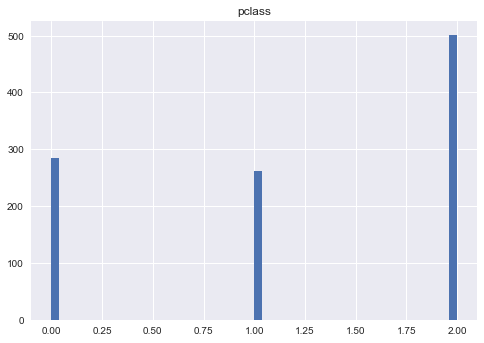

In [195]:
# histogram for travel class
df4.hist(column='pclass', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233c97f0>]], dtype=object)

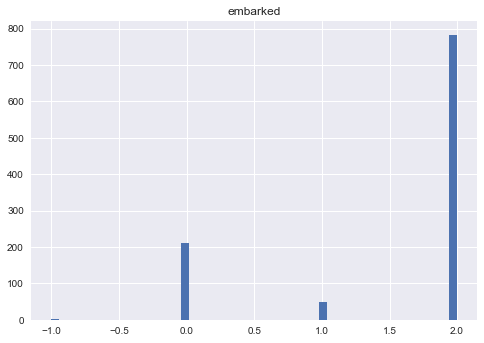

In [196]:
# histogram for embarkation port
df4.hist(column='embarked', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123554f60>]], dtype=object)

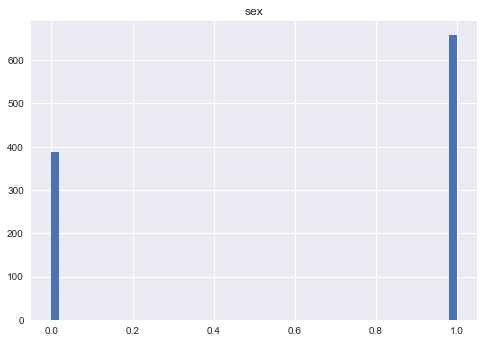

In [197]:
# histogram for gender
df4.hist(column='sex', bins=50)

In [146]:
df4.shape

(1309, 14)

In [147]:
# take only not null ages
df4 = df4[df4.age.notnull()]
df4.shape

(1046, 14)

In [148]:
# split age into discrete decade intervals
pd.cut(df4.age, (0,10,20,30,40,50,60,70,80)).value_counts()

(20, 30]    361
(30, 40]    210
(10, 20]    162
(40, 50]    132
(0, 10]      86
(50, 60]     62
(60, 70]     27
(70, 80]      6
Name: age, dtype: int64

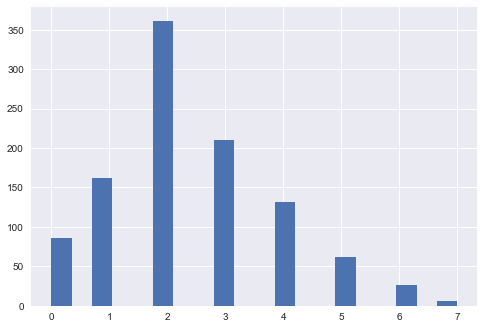

In [199]:
# histogram for age
pd.cut(df4.age, (0,10,20,30,40,50,60,70,80)).cat.codes.hist(bins=20)

#### 3.3

1    22
2    65
3    94
4    46
5    41
6    21
7     5
8     1
dtype: int64


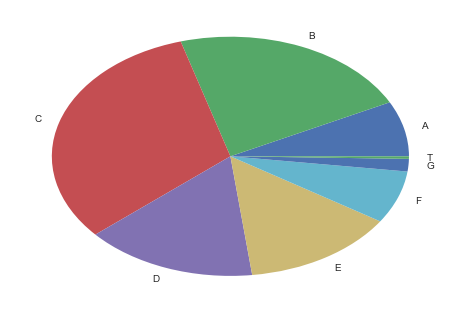

In [150]:
df5 = pd.read_excel('Data/titanic.xls')
cabin = list(df5['cabin'])
cabin = [x for x in cabin if str(x)!='nan']
floor = list(map(lambda x : x[0], cabin)) #We assume that if someone takes 2 cabines they are on the same floor
mapFloor = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
floor = pd.Series(floor).map(mapFloor).value_counts().sort_index()
print(floor)

plt.pie(floor, labels=['A','B','C','D','E','F','G','T']);

#### 3.4

In [156]:
df6 = pd.read_excel('Data/titanic.xls')

In [157]:
classSurvivor = df6.groupby('pclass').mean()['survived']

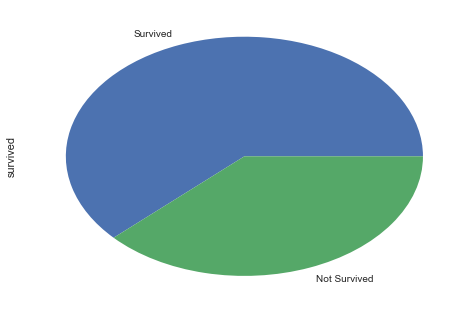

In [158]:
# proportion of first calls
firstClass = classSurvivor[classSurvivor.index==1]
firstClass.loc[2] = 1 - firstClass.loc[1]
firstClass.plot.pie(labels=['Survived','Not Survived'])

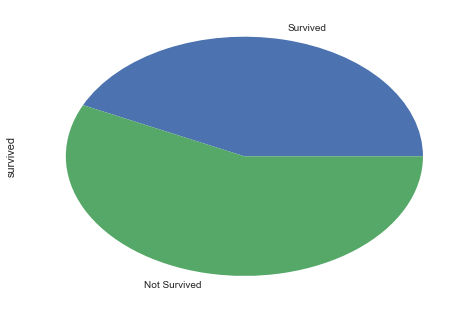

In [159]:
# proportion of first second survivors
secondClass = classSurvivor[classSurvivor.index==2]
secondClass.loc[3] = 1 - secondClass.loc[2]
secondClass.plot.pie(labels=['Survived','Not Survived'])

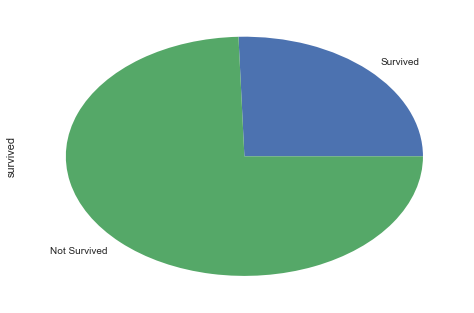

In [160]:
# proportion of first third survivors
secondClass = classSurvivor[classSurvivor.index==3]
secondClass.loc[2] = 1 - secondClass.loc[3]
secondClass.plot.pie(labels=['Survived','Not Survived'])

#### 3.5

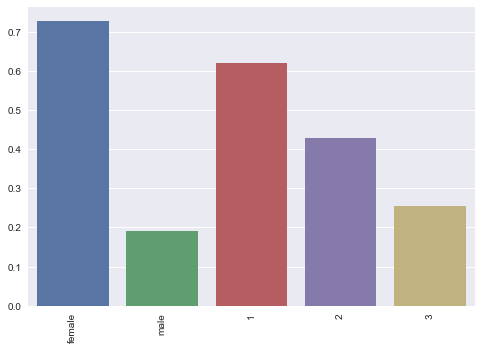

In [162]:
df7 = pd.read_excel('Data/titanic.xls')
class_count=df7.groupby('pclass').size()
class_count.name="count"
sex_count=df7.groupby('sex').size()
sex_count.name="count"
class_survive=df7.groupby('pclass')['survived'].sum()
sex_survive=df7.groupby('sex')['survived'].sum()

dfClass=pd.DataFrame([class_survive, class_count])
dfSex=pd.DataFrame([sex_survive, sex_count])


proportion_survived_sex=dfSex.loc['survived']/dfSex.loc['count']
proportion_survived_class=dfClass.loc['survived']/dfClass.loc['count']

def nice_bar_plot(data):  
    sns.barplot(data.keys(), data)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
nice_bar_plot(proportion_survived_sex.append(proportion_survived_class))

#### 3.6

In [163]:
df36 = pd.read_excel('Data/titanic.xls')

In [164]:
df36.shape

(1309, 14)

In [165]:
# drop related null values rows
df36 = df36[df36.age.notnull()]
df36 = df36[df36.pclass.notnull()]
df36 = df36[df36.sex.notnull()]
df36.shape

(1046, 14)

In [166]:
# equally populated age categories 
df36.age = pd.qcut(df36.age, 2)

In [167]:
# Verification
# First age category: %51
df36[df36.age.cat.codes==0].shape

(536, 14)

In [168]:
# First age category: %49
df36[df36.age.cat.codes==1].shape

(510, 14)

In [169]:
# convert pclass to category
df36['pclass'] = df36.pclass.astype('category')

# convert sex to category
df36['sex'] = df36.sex.astype('category')

In [170]:
# resulting dataframe
dfResult = df36.groupby(['age', 'pclass', 'sex']).mean()['survived']
dfResult

age            pclass  sex   
(0.166, 28.0]  1       female    0.951220
                       male      0.531250
               2       female    0.910714
                       male      0.216216
               3       female    0.513761
                       male      0.183036
(28.0, 80.0]   1       female    0.967391
                       male      0.302521
               2       female    0.872340
                       male      0.083333
               3       female    0.372093
                       male      0.144000
Name: survived, dtype: float64

In [171]:
# check if indexes are unique
dfResult.is_unique

True